In [1]:
# Python Library
import os
import glob
import sys
import numpy as np

from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy import units as u
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
from astropy.table import hstack
import warnings
warnings.filterwarnings("ignore")

# Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl

# Jupyter Setting
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [5]:
intbl = Table.read("/large_data/factory/skygrid/skygrid_tiles_7DS.csv")
intbl[:3]

#id,ra,dec,tile,cover
int64,float64,float64,str6,bool
0,0.0,-90.0,T00000,False
1,0.0,-89.15094339622642,T00001,False
2,51.42857142857143,-89.15094339622642,T00002,False


In [15]:
observed_tiles = [os.path.basename(path) for path in sorted(glob.glob("/large_data/processed_1x1_gain2750/T?????"))]
print(f"{len(observed_tiles):_} covered")

1_126 covered


In [18]:
for tile in observed_tiles:
	indx_tile = np.where(intbl['tile'] == tile)
	intbl['cover'][indx_tile] = True

outbl = intbl[intbl['cover']==True]
outbl

#id,ra,dec,tile,cover
int64,float64,float64,str6,bool
0,0.0,-90.0,T00000,True
2,51.42857142857143,-89.15094339622642,T00002,True
7,308.57142857142856,-89.15094339622642,T00007,True
9,32.72727272727273,-88.30188679245282,T00009,True
15,229.0909090909091,-88.30188679245282,T00015,True
16,261.8181818181818,-88.30188679245282,T00016,True
18,327.2727272727273,-88.30188679245282,T00018,True
30,263.99999999999994,-87.45283018867924,T00030,True
32,312.0,-87.45283018867924,T00032,True


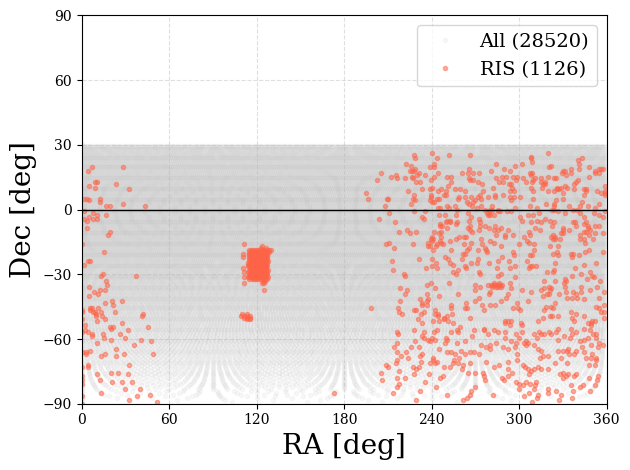

In [43]:
plt.plot(intbl['ra'], intbl['dec'], '.', alpha=0.1, color='silver', label=f"All ({len(intbl)})")
plt.plot(outbl['ra'], outbl['dec'], '.', alpha=0.5, color='tomato', label=f'RIS ({len(outbl)})')
plt.axhline(y=0, c='k', lw=1)
plt.xlim(0, 360)
_ = plt.xticks(np.arange(0, 360+60, 60))
plt.xlabel("RA [deg]")
plt.ylim(-90, 90)
_ = plt.yticks(np.arange(-90, 90+30, 30))
plt.ylabel("Dec [deg]")
plt.grid("both", color='silver', ls='--', alpha=0.5)
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)